In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/headlines.csv')

In [7]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
df.shape

(26709, 3)

In [9]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [10]:
headlines=df['headline']
headlines

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [11]:
label=df['is_sarcastic']
label

0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64

In [0]:
x_train,x_test,y_train,y_test=train_test_split(headlines,label,random_state=42,test_size=0.2)

In [0]:
tokenizer=Tokenizer()

In [0]:
tokenizer.fit_on_texts(x_train)

In [15]:
word_index=tokenizer.word_index
word_size=len(word_index)+1
word_size

26536

In [0]:
train_sequence=tokenizer.texts_to_sequences(x_train)
train_padded=pad_sequences(train_sequence,maxlen=30)

In [0]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_padded=pad_sequences(test_sequence,maxlen=30)

In [18]:
# Used a api of globe for faster access
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((word_size,100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-04-28 05:45:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  87.4MB/s    in 3.8s    

2020-04-28 05:45:58 (87.4 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



## Checking accurcay with different models


### Single Layer Bidirectional LSTM

In [0]:
model1=Sequential()

In [0]:
model1.add(Embedding(word_size,100, input_length=30, weights=[embeddings_matrix], trainable=False))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(64)))
model1.add(Dense(1,activation='sigmoid'))

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2653600   
_________________________________________________________________
dropout (Dropout)            (None, 30, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,738,209
Trainable params: 84,609
Non-trainable params: 2,653,600
_________________________________________________________________


In [0]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model1.fit(train_padded,y_train,epochs=20,validation_data=(test_padded,y_test))

Epoch 1/20
668/668 [==============================] - 7s 10ms/step - loss: 0.5007 - accuracy: 0.7552 - val_loss: 0.3944 - val_accuracy: 0.8242
Epoch 2/20
668/668 [==============================] - 6s 9ms/step - loss: 0.3799 - accuracy: 0.8287 - val_loss: 0.3580 - val_accuracy: 0.8443
Epoch 3/20
668/668 [==============================] - 6s 9ms/step - loss: 0.3364 - accuracy: 0.8536 - val_loss: 0.3415 - val_accuracy: 0.8525
Epoch 4/20
668/668 [==============================] - 6s 10ms/step - loss: 0.3105 - accuracy: 0.8641 - val_loss: 0.3423 - val_accuracy: 0.8504
Epoch 5/20
668/668 [==============================] - 6s 9ms/step - loss: 0.2793 - accuracy: 0.8803 - val_loss: 0.3693 - val_accuracy: 0.8531
Epoch 6/20
668/668 [==============================] - 6s 9ms/step - loss: 0.2631 - accuracy: 0.8870 - val_loss: 0.3152 - val_accuracy: 0.8656
Epoch 7/20
668/668 [==============================] - 6s 9ms/step - loss: 0.2411 - accuracy: 0.9002 - val_loss: 0.3938 - val_accuracy: 0.8418
Epoc

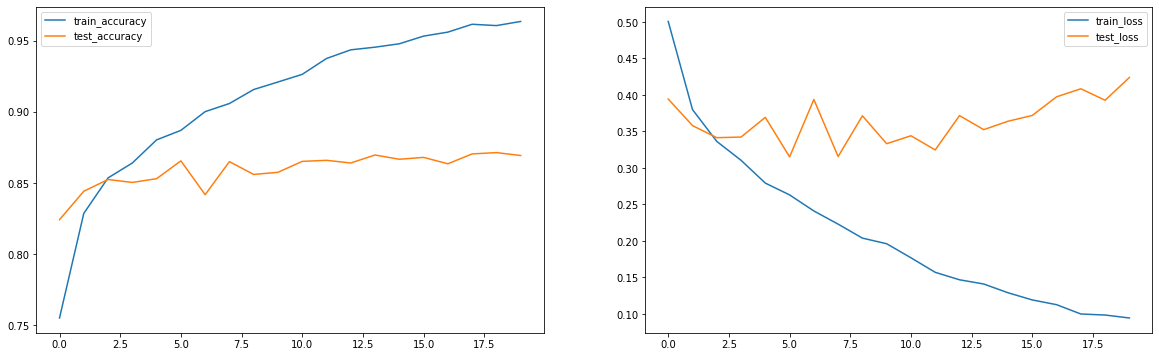

In [24]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

### Bidirectional Multilayer Layer LSTM


In [0]:
model2=Sequential()

In [0]:
model2.add(Embedding(word_size,100, input_length=30, weights=[embeddings_matrix], trainable=False))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(32,return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dense(1,activation='sigmoid'))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2653600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 64)            34048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,712,545
Trainable params: 58,945
Non-trainable params: 2,653,600
_______________________________________

In [0]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history=model2.fit(train_padded,y_train,epochs=20,validation_data=(test_padded,y_test))

Epoch 1/20
668/668 [==============================] - 11s 17ms/step - loss: 0.5222 - accuracy: 0.7389 - val_loss: 0.4150 - val_accuracy: 0.8132
Epoch 2/20
668/668 [==============================] - 10s 15ms/step - loss: 0.4182 - accuracy: 0.8075 - val_loss: 0.3703 - val_accuracy: 0.8392
Epoch 3/20
668/668 [==============================] - 10s 15ms/step - loss: 0.3732 - accuracy: 0.8345 - val_loss: 0.3476 - val_accuracy: 0.8527
Epoch 4/20
668/668 [==============================] - 10s 15ms/step - loss: 0.3528 - accuracy: 0.8442 - val_loss: 0.3269 - val_accuracy: 0.8609
Epoch 5/20
668/668 [==============================] - 10s 15ms/step - loss: 0.3269 - accuracy: 0.8563 - val_loss: 0.3308 - val_accuracy: 0.8596
Epoch 6/20
668/668 [==============================] - 10s 15ms/step - loss: 0.3124 - accuracy: 0.8647 - val_loss: 0.3144 - val_accuracy: 0.8673
Epoch 7/20
668/668 [==============================] - 10s 15ms/step - loss: 0.3022 - accuracy: 0.8685 - val_loss: 0.3084 - val_accuracy:

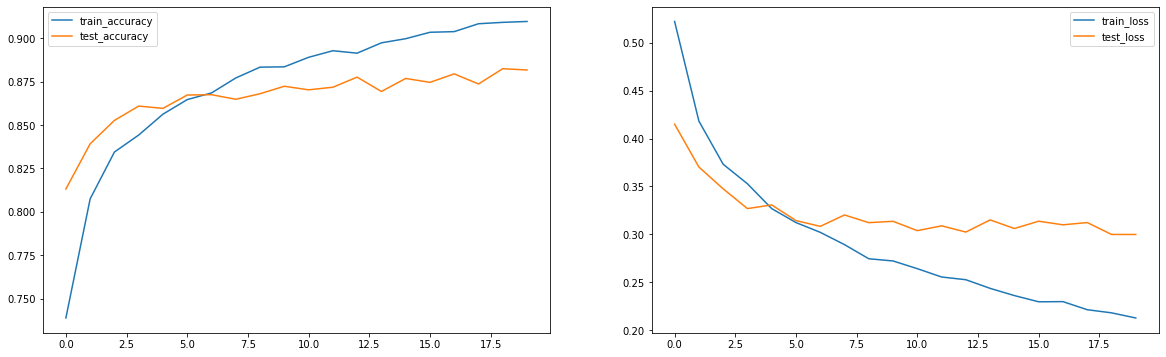

In [30]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

#### ***Using Globe Embedding Ovefitting Has been removed and both increse in test loss and decrese in taring accuracy is also solved.***


#### ***Accuracy also increased to 88%***

### ***Bidirectional Multilayer LSTM is a better fit model with good accuracy.***